In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from scipy import stats
import pandas as pd
import plotly.express as px
warnings.simplefilter(action="ignore")

In [3]:
data = pd.read_csv('06e9c61d-e45f-4d74-beb5-e5e53ac6d2de.csv')

# Exploration

## Exploration basique

In [4]:
data.shape

(16512, 11)

In [5]:
data.head()

Unnamed: 0  longitude  latitude  housing_median_age  total_rooms  \
0        2072    -119.84     36.77                 6.0       1853.0   
1       10600    -117.80     33.68                 8.0       2032.0   
2        2494    -120.19     36.60                25.0        875.0   
3        4284    -118.32     34.10                31.0        622.0   
4       16541    -121.23     37.79                21.0       1922.0   

   total_bedrooms  population  households  median_income  median_house_value  \
0           473.0      1397.0       417.0         1.4817             72000.0   
1           349.0       862.0       340.0         6.9133            274100.0   
2           214.0       931.0       214.0         1.5536             58300.0   
3           229.0       597.0       227.0         1.5284            200000.0   
4           373.0      1130.0       372.0         4.0815            117900.0   

  ocean_proximity  
0          INLAND  
1       <1H OCEAN  
2          INLAND  
3       <1H OCEAN  
4          INLAND

In [6]:
#Premièrement on remarque un colonne sans nom, probablement une colonne ID
#On remarque aussi qu'il n'y a que des variables quantitatives, exception faite de ocean_proximity qui demandera surement un traitement

In [7]:
data.describe()

Unnamed: 0     longitude      latitude  housing_median_age  \
count  16512.000000  16512.000000  16512.000000        16512.000000   
mean   10295.498789   -119.564046     35.626523           28.624516   
std     5941.973488      2.005033      2.139150           12.597980   
min        0.000000   -124.350000     32.540000            1.000000   
25%     5178.750000   -121.790000     33.930000           18.000000   
50%    10263.500000   -118.490000     34.250000           29.000000   
75%    15438.250000   -118.010000     37.710000           37.000000   
max    20639.000000   -114.310000     41.950000           52.000000   

        total_rooms  total_bedrooms    population    households  \
count  16512.000000    16336.000000  16512.000000  16512.000000   
mean    2644.170603      539.319540   1435.017260    501.135962   
std     2213.946369      425.207704   1158.151967    385.650673   
min        6.000000        2.000000      3.000000      2.000000   
25%     1446.000000      296.000000    788.000000    280.000000   
50%     2116.000000      435.000000   1168.000000    410.000000   
75%     3154.000000      647.000000   1738.000000    606.000000   
max    39320.000000     6445.000000  35682.000000   6082.000000   

       median_income  median_house_value  
count   16512.000000        16512.000000  
mean        3.864091       206509.251453  
std         1.893244       115225.957661  
min         0.499900        14999.000000  
25%         2.562500       119400.000000  
50%         3.531300       179300.000000  
75%         4.733225       264500.000000  
max        15.000100       500001.000000

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16512 non-null  int64  
 1   longitude           16512 non-null  float64
 2   latitude            16512 non-null  float64
 3   housing_median_age  16512 non-null  float64
 4   total_rooms         16512 non-null  float64
 5   total_bedrooms      16336 non-null  float64
 6   population          16512 non-null  float64
 7   households          16512 non-null  float64
 8   median_income       16512 non-null  float64
 9   median_house_value  16512 non-null  float64
 10  ocean_proximity     16512 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.4+ MB


## Check des doublons

In [9]:
#On regarde s'il y a des duplicats dans la colonne sans nom
data['Unnamed: 0'].duplicated().sum()

0

In [10]:
#L'absence de duplicats confirme l'hypothèse qu'il s'agit d'une colonne d'identifiants
#n peut donc retirer cette colonne sans problèmes

In [23]:
data=data.drop("Unnamed: 0", axis=1)
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -119.84     36.77                 6.0       1853.0           473.0   
1    -117.80     33.68                 8.0       2032.0           349.0   
2    -120.19     36.60                25.0        875.0           214.0   
3    -118.32     34.10                31.0        622.0           229.0   
4    -121.23     37.79                21.0       1922.0           373.0   

   population  households  median_income  median_house_value ocean_proximity  
0      1397.0       417.0         1.4817             72000.0          INLAND  
1       862.0       340.0         6.9133            274100.0       <1H OCEAN  
2       931.0       214.0         1.5536             58300.0          INLAND  
3       597.0       227.0         1.5284            200000.0       <1H OCEAN  
4      1130.0       372.0         4.0815            117900.0          INLAND

In [24]:
#On regarde s'il y a des doublons dans le reste du df
data.duplicated().sum()

0

In [12]:
#Rien de ce côté, le df semble propre à ce niveau là.
#Cependant, si deux maisons différentes peuvent en toute logique avoir le même nombre de chambre, ou le même âge,
#il n'est pas vraiment possible que deux maisons différentes aient les mêmes coordonnées GPS.
#Nous devont donc regarder si nous trouvons ce cas de figure

In [25]:
data[['longitude','latitude']].duplicated().sum()

5681

In [14]:
#En effet, nous avons 5681 lignes où les coordonnées GPS sont les mêmes. 

In [15]:
#Il semble maintenant pertinent de regarder les lignes concernées dans le détail :
duplicate_rows = data.duplicated(subset=['longitude', 'latitude'])
data_duplicated=data[duplicate_rows]
data_duplicated

Unnamed: 0  longitude  latitude  housing_median_age  total_rooms  \
158         17934    -121.95     37.35                48.0       1246.0   
248           208    -122.23     37.79                30.0        610.0   
251          1164    -121.55     39.51                48.0        827.0   
270          6779    -118.15     34.11                39.0       2618.0   
341          7229    -118.16     34.02                44.0       1218.0   
...           ...        ...       ...                 ...          ...   
16504         433    -122.29     37.88                46.0       1895.0   
16505       11527    -118.08     33.77                26.0       2461.0   
16506       14696    -117.09     32.79                36.0       1529.0   
16508       18898    -122.25     38.11                49.0       2365.0   
16510        6637    -118.14     34.16                39.0       2776.0   

       total_bedrooms  population  households  median_income  \
158             294.0       697.0       284.0         3.6118   
248             145.0       425.0       140.0         1.6198   
251             198.0       396.0       161.0         0.8024   
270             582.0      1314.0       532.0         3.5875   
341             374.0      1175.0       342.0         1.9688   
...               ...         ...         ...            ...   
16504           442.0       920.0       425.0         2.9926   
16505           562.0       971.0       544.0         2.1944   
16506           266.0       683.0       260.0         4.0982   
16508           504.0      1131.0       458.0         2.6133   
16510           840.0      2546.0       773.0         2.5750   

       median_house_value ocean_proximity  
158              235500.0       <1H OCEAN  
248              122700.0        NEAR BAY  
251               58300.0          INLAND  
270              309300.0       <1H OCEAN  
341              173900.0       <1H OCEAN  
...                   ...             ...  
16504            192100.0        NEAR BAY  
16505             87500.0       <1H OCEAN  
16506            171200.0      NEAR OCEAN  
16508            103100.0        NEAR BAY  
16510            153500.0       <1H OCEAN  

[5681 rows x 11 columns]

In [16]:
#Regardons maintenant si ces doublons ont quelques colonnes en doublon aussi
print(data_duplicated.duplicated(subset=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms']).sum())
print(data_duplicated.duplicated(subset=['longitude','latitude','population','ocean_proximity','median_house_value']).sum())
print(data_duplicated.duplicated(subset=['longitude','latitude','households','median_house_value','housing_median_age']).sum())

0
0
0


In [17]:
#Il semble que ces doublons soient bien des individus différents.
#Il peut donc s'agir d'une erreur dans les données, ou d'une préconcéption fausse de ma part.
#Il est donc intéressant de faire quelques recherches pour savoir s'il est possible ou non pour deux biens différentes
#d'avoir les mêmes latitudes et longitudes

Point recherche 

In [18]:
#Après plus d'informations, il est effectivement possible d'avoir la même latitude et longitude pour deux biens différents, 
#Car dans les zones densément peuplées, il faudrait des coordonnées plus précises pour éviter les doublons.
#Je décide donc de garder les doublons

## Check des valeurs manquantes

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16336 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [28]:
#Combien de valeurs nulles dans la colonne ?
data['total_bedrooms'].isnull().sum()

176

In [21]:
#Et en pourcentage du total de la colonne ?
data['total_bedrooms'].isnull().sum() * 100 / len(data)

1.065891472868217

In [22]:
#ça ne représente pas une grande portion des données(un peu plus d'1%).
#On pourrait donc les retirer, ou imputer par la médiane.
#Je préfère faire un peu de recherche pour trouver des meilleures méthodes d'imputation.

Point recherche

In [22]:
#Après quelques recherches, je décide de me pencher sur une approche d'imputation multivariée en utilisant KNNimputer
#C'est un étape qui viendra plus tard.

In [23]:
#Pour les autres colonnes, il n'y a pas de valeurs nulles, ce qui ne veut pas dire qu'il n'y a pas de valeurs manquantes, 
#puisqu'elles auraient pu être traitées au préalable. 

#On émet l'hypothèse que des valeurs nulles ont été remplacées par un 0.

In [24]:
data.drop("Unnamed: 0", axis=1).describe()

longitude      latitude  housing_median_age   total_rooms  \
count  16512.000000  16512.000000        16512.000000  16512.000000   
mean    -119.564046     35.626523           28.624516   2644.170603   
std        2.005033      2.139150           12.597980   2213.946369   
min     -124.350000     32.540000            1.000000      6.000000   
25%     -121.790000     33.930000           18.000000   1446.000000   
50%     -118.490000     34.250000           29.000000   2116.000000   
75%     -118.010000     37.710000           37.000000   3154.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    16336.000000  16512.000000  16512.000000   16512.000000   
mean       539.319540   1435.017260    501.135962       3.864091   
std        425.207704   1158.151967    385.650673       1.893244   
min          2.000000      3.000000      2.000000       0.499900   
25%        296.000000    788.000000    280.000000       2.562500   
50%        435.000000   1168.000000    410.000000       3.531300   
75%        647.000000   1738.000000    606.000000       4.733225   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        16512.000000  
mean        206509.251453  
std         115225.957661  
min          14999.000000  
25%         119400.000000  
50%         179300.000000  
75%         264500.000000  
max         500001.000000

In [25]:
#On remarque que le minimum est supérieur à 0 pour toutes les variables. On peut donc exclure l'hypothèse que des données 
#manquantes auraient pu être remplacées par des 0.
#Il ne semble pas y avoir de valeurs manquantes pour ces colonnes, mais il reste la variable qualitative

In [26]:
data['ocean_proximity'].value_counts()

<1H OCEAN     7312
INLAND        5235
NEAR OCEAN    2140
NEAR BAY      1821
ISLAND           4
Name: ocean_proximity, dtype: int64

In [27]:
#Il n'y a pas de classe qui correspondrait à un traitement de valeur manquantes
#Je remarque par ailleurs que la répartition dans les classes est très déséquilibrée.

In [28]:
#Conclusion : Il faudra imputer les valeurs manquantes de la variable total_bedrooms plus tard
#autrement, il n'y a pas de valeurs manquantes dans ce jeu de données

## Visualisation & exploration

In [29]:
#Commençons par regarder les distributions des variables quantitatives

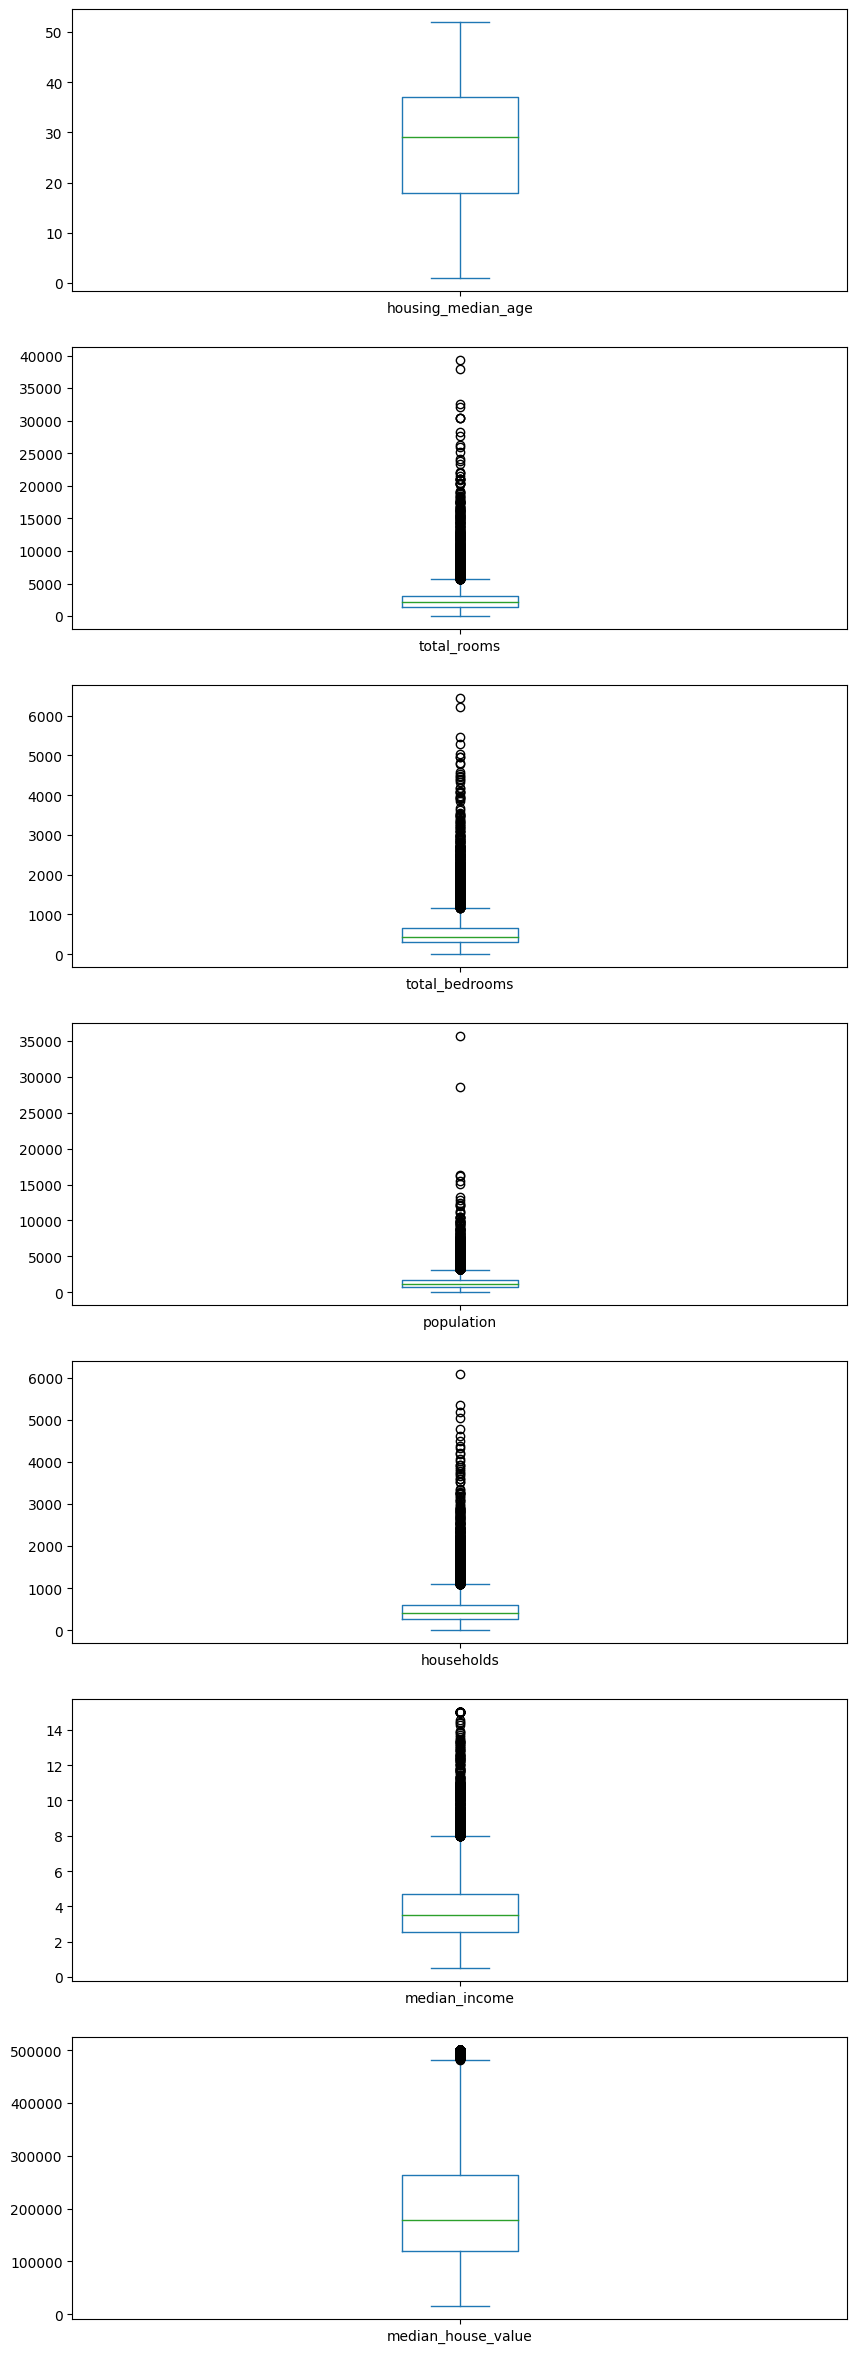

In [48]:
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

columns=data.drop(['ocean_proximity','latitude','longitude'], axis=1).columns

fig = plt.figure(figsize=(10, 30))
gs = gridspec.GridSpec(len(columns), 1)

for i, col in enumerate(columns):
    ax = fig.add_subplot(gs[i, 0])
    data[col].plot(kind='box', ax=ax)

In [ ]:
#On remarque beacoups d'outliers, mais particulièrement 2 outliers dans Population

In [31]:
data.sort_values(['population'],ascending=False).head(2)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
7471     -117.42     33.35                14.0      25135.0          4819.0   
14503    -121.79     36.64                11.0      32627.0          6445.0   

       population  households  median_income  median_house_value  \
7471      35682.0      4769.0         2.5729            134400.0   
14503     28566.0      6082.0         2.3087            118800.0   

      ocean_proximity  
7471        <1H OCEAN  
14503       <1H OCEAN

In [35]:
data.mean()

longitude               -119.564046
latitude                  35.626523
housing_median_age        28.624516
total_rooms             2644.170603
total_bedrooms           539.319540
population              1435.017260
households               501.135962
median_income              3.864091
median_house_value    206509.251453
dtype: float64

In [ ]:
#En comparant avec les moyennes des variables, on peut voir que ces outliers sont préoccupant,
#Car ils sont bie au dessus de la moyenne dans beaucoup de variables, mais en dessous en terme de prix et de revenu median.
#Il semble donc s'agir de cas particulier (logement sociaux ?)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

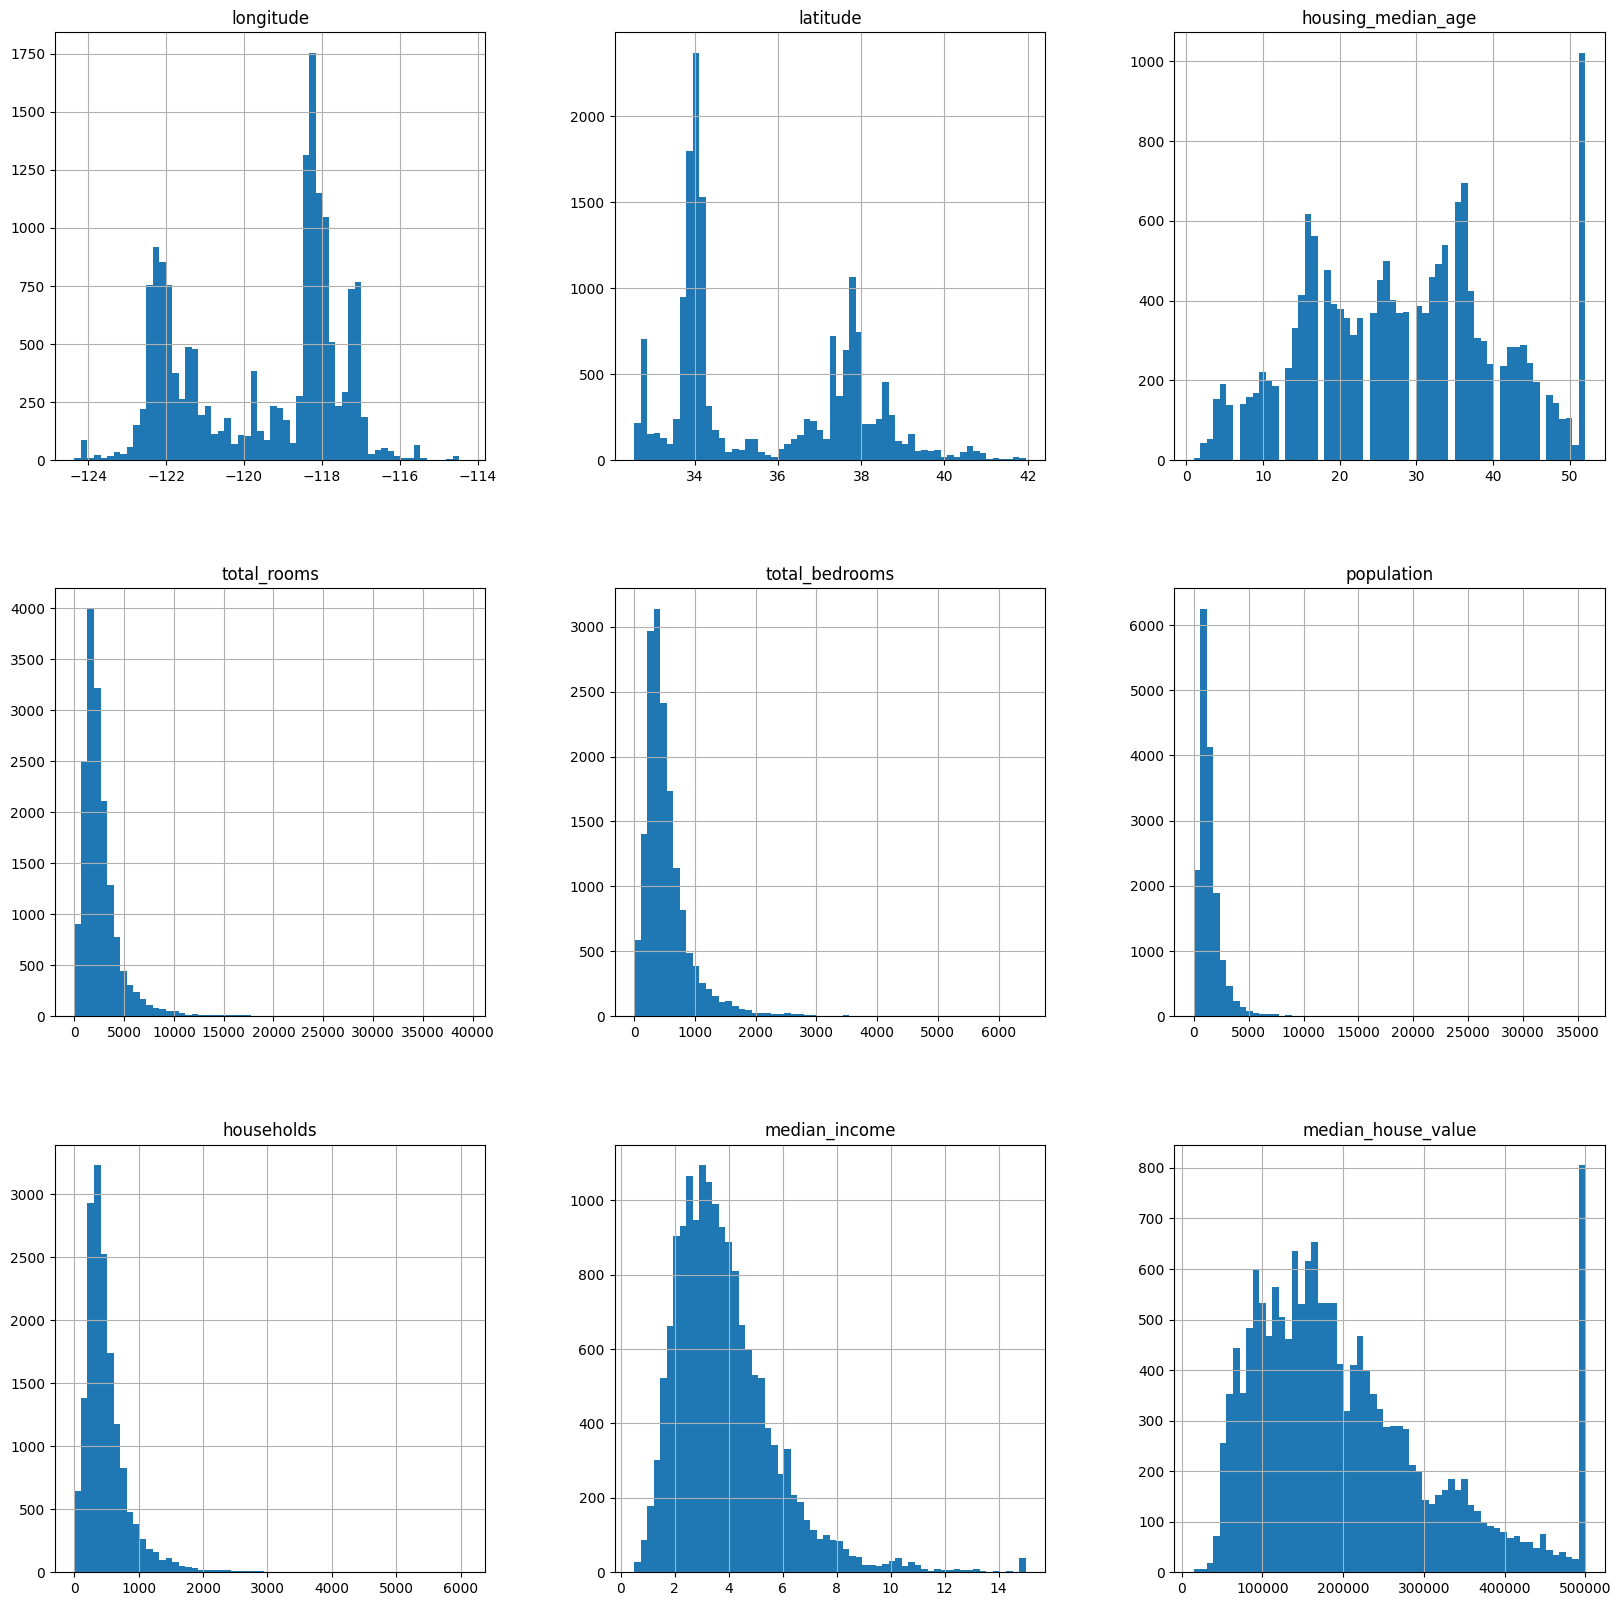

In [49]:
data.hist(bins=60,figsize=(20, 20))

In [ ]:
#On voit des outliers préoccupant pour la variable housing_median_age et median_house_value
#Ces outliers font plutôt penser à la somme des tous les individus dépassant le maximum.
#Il sera donc préferable des les retirer

In [ ]:
#On voit aussi que la distribution des variables ne suit pas une loi normale, car il y a une forte assymétrie.
#C'est un problème qu'il faudra aussi régler par la suite, car cela impactera beaucoup notre modèle.

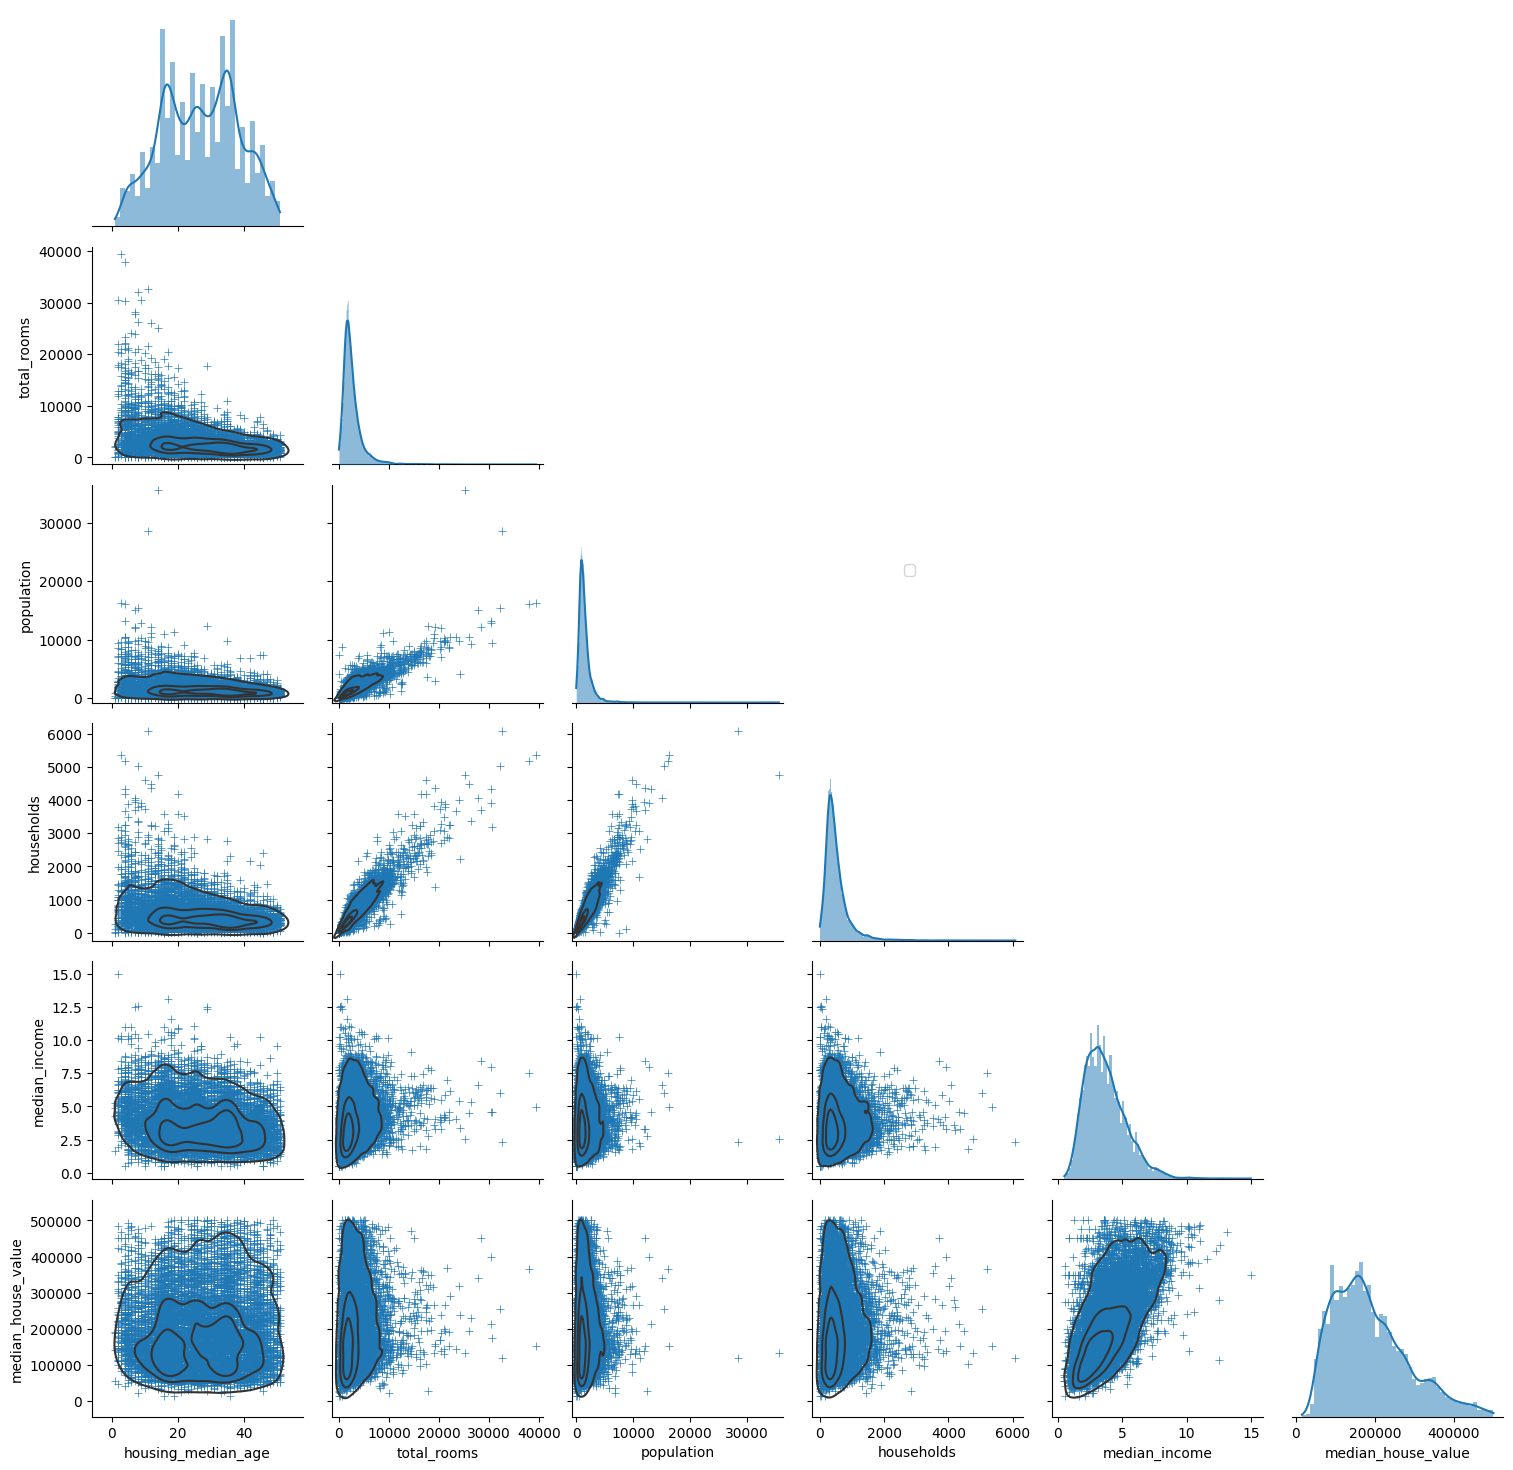

In [79]:
g = sns.PairGrid(data = data.drop(['ocean_proximity','latitude','longitude'], axis=1),corner = True)
g.map_lower(sns.kdeplot, hue = None, levels = 4, color = ".2")
g.map_lower(sns.scatterplot, marker = "+")
g.map_diag(sns.histplot, element = 'step', linewidth=0,kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61,.6))

<AxesSubplot:>

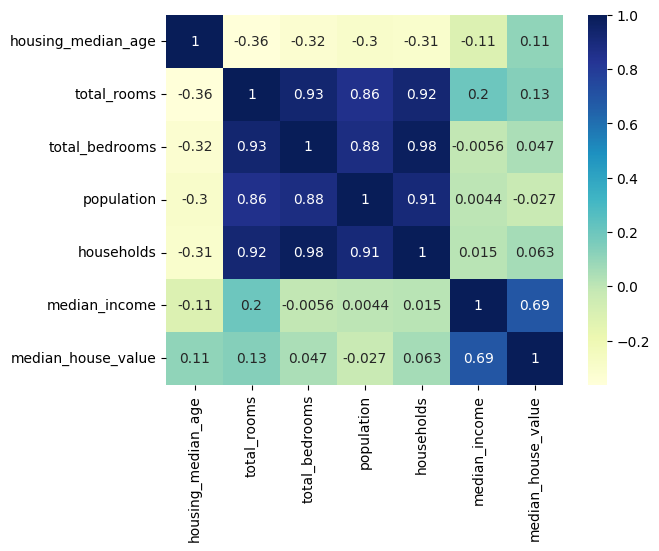

In [51]:
sns.heatmap(data[columns].corr(), cmap="YlGnBu", annot=True)

In [42]:
#On remarque que certaines variables sont extremement correlées, les plus évidentes étant total_bedrooms et households.
#On pourrait donc retirer une de ces variables. Il serait judicieux de retirer la variable total_bedrooms, puisqu'elle contient
#des valeurs manquantes. On pourrait donc à la fois rendre le modèle plus simple et éviter l'imputation

# Nettoyage

## Baseline

In [36]:
data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -119.84     36.77                 6.0       1853.0           473.0   
1        -117.80     33.68                 8.0       2032.0           349.0   
2        -120.19     36.60                25.0        875.0           214.0   
3        -118.32     34.10                31.0        622.0           229.0   
4        -121.23     37.79                21.0       1922.0           373.0   
...          ...       ...                 ...          ...             ...   
16507    -121.90     39.59                20.0       1465.0           278.0   
16508    -122.25     38.11                49.0       2365.0           504.0   
16509    -121.22     38.92                19.0       2531.0           461.0   
16510    -118.14     34.16                39.0       2776.0           840.0   
16511    -124.13     40.80                31.0       2152.0           462.0   

       population  households  median_income  median_house_value  \
0          1397.0       417.0         1.4817             72000.0   
1           862.0       340.0         6.9133            274100.0   
2           931.0       214.0         1.5536             58300.0   
3           597.0       227.0         1.5284            200000.0   
4          1130.0       372.0         4.0815            117900.0   
...           ...         ...            ...                 ...   
16507       745.0       250.0         3.0625             93800.0   
16508      1131.0       458.0         2.6133            103100.0   
16509      1206.0       429.0         4.4958            192600.0   
16510      2546.0       773.0         2.5750            153500.0   
16511      1259.0       420.0         2.2478             81100.0   

      ocean_proximity  
0              INLAND  
1           <1H OCEAN  
2              INLAND  
3           <1H OCEAN  
4              INLAND  
...               ...  
16507          INLAND  
16508        NEAR BAY  
16509          INLAND  
16510       <1H OCEAN  
16511      NEAR OCEAN  

[16512 rows x 10 columns]

In [37]:
#Pour le baseline, on retire tout simplement les valeurs manquantes.
data.shape

(16512, 10)

In [41]:
data_baseline=data.dropna()
data_baseline.shape

(16336, 10)

In [42]:
data_baseline.to_csv('data_baseline.csv', index = False, encoding='utf-8')

## 1ere iteration

In [46]:
#On retire la colonne total_bedrooms car trop correlée et avec des valeurs nulles
data_iter1=data.drop(['total_bedrooms'],axis=1)

In [47]:
data_iter1.head()

longitude  latitude  housing_median_age  total_rooms  population  \
0    -119.84     36.77                 6.0       1853.0      1397.0   
1    -117.80     33.68                 8.0       2032.0       862.0   
2    -120.19     36.60                25.0        875.0       931.0   
3    -118.32     34.10                31.0        622.0       597.0   
4    -121.23     37.79                21.0       1922.0      1130.0   

   households  median_income  median_house_value ocean_proximity  
0       417.0         1.4817             72000.0          INLAND  
1       340.0         6.9133            274100.0       <1H OCEAN  
2       214.0         1.5536             58300.0          INLAND  
3       227.0         1.5284            200000.0       <1H OCEAN  
4       372.0         4.0815            117900.0          INLAND

In [ ]:
#En regardant la répartition, on peut voir que la classe island est extremement sous-représentée
#On fait donc le choix d'agglomérer cette classe dans la classe <1H OCEAN

In [48]:
data_iter1['ocean_proximity'].value_counts()

<1H OCEAN     7312
INLAND        5235
NEAR OCEAN    2140
NEAR BAY      1821
ISLAND           4
Name: ocean_proximity, dtype: int64

In [49]:
data_iter1['ocean_proximity'] = data_iter1['ocean_proximity'].replace("ISLAND", "<1H OCEAN")

In [50]:
data_iter1['ocean_proximity'].value_counts()

<1H OCEAN     7316
INLAND        5235
NEAR OCEAN    2140
NEAR BAY      1821
Name: ocean_proximity, dtype: int64

In [51]:
#export iter 1 :
data_iter1.to_csv('data_iter1.csv', index = False, encoding='utf-8')

In [52]:
#reste à standardiser et à s'occuper des outliers, encoder ocean_proximity

## 2eme iteration

### encoding ocean_proximity

In [137]:
data_iter2 = data_iter1
data_iter2['ocean_proximity'].value_counts()

<1H OCEAN     7316
INLAND        5235
NEAR OCEAN    2140
NEAR BAY      1821
Name: ocean_proximity, dtype: int64

In [ ]:
#Je me renseigne sur les différentes manières de procéder

Point recherche

In [89]:
#Il n'est pas clair s'il s'agit d'une variable nominale ou ordinale
#Mon hypothèse est qu'il s'agit d'une variable ordinale car je pense qu'il est possible d'ordonner les classes par proximité
#De l'ocean. Il reste un flou sur l'ordre, par exemple un bloc NEAR BAY est-il plus proche de l'ocean qu'un bloc NEAR OCEAN ?

#Je décide donc de regarder géographiquement les différentes classes pour trouver un ordre

In [54]:
fig = px.scatter_geo(data_iter2.loc[data_iter2['ocean_proximity']=='NEAR OCEAN'], lat='latitude', lon='longitude')
fig.update_layout(title = 'World map', title_x=0.5)
fig.show()

In [87]:
fig = px.scatter_geo(data_iter2.loc[data_iter2['ocean_proximity']=='NEAR BAY'], lat='latitude', lon='longitude')
fig.update_layout(title = 'World map', title_x=0.5)
fig.show()

In [88]:
fig = px.scatter_geo(data_iter2.loc[data_iter2['ocean_proximity']=='<1H OCEAN'], lat='latitude', lon='longitude')
fig.update_layout(title = 'World map', title_x=0.5)
fig.show()

In [ ]:
#Au final, il est difficile d'établir un ordre clair entre les différentes classe.
#Je rejette donc mon hypothèse et considère cette variable comme nominale.

In [138]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(data_iter2[['ocean_proximity']]).toarray())

#merge one-hot encoded columns back with original DataFrame
data_iter2 = data_iter2.join(encoder_df)

#view final df
data_iter2.head()

longitude  latitude  housing_median_age  total_rooms  population  \
0    -119.84     36.77                 6.0       1853.0      1397.0   
1    -117.80     33.68                 8.0       2032.0       862.0   
2    -120.19     36.60                25.0        875.0       931.0   
3    -118.32     34.10                31.0        622.0       597.0   
4    -121.23     37.79                21.0       1922.0      1130.0   

   households  median_income  median_house_value ocean_proximity    0    1  \
0       417.0         1.4817             72000.0          INLAND  0.0  1.0   
1       340.0         6.9133            274100.0       <1H OCEAN  1.0  0.0   
2       214.0         1.5536             58300.0          INLAND  0.0  1.0   
3       227.0         1.5284            200000.0       <1H OCEAN  1.0  0.0   
4       372.0         4.0815            117900.0          INLAND  0.0  1.0   

     2    3  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0

In [140]:
data_iter2=data_iter2.drop(['ocean_proximity'],axis=1)

In [141]:
#export iter 2 :
data_iter2.to_csv('data_iter2.csv', index = False, encoding='utf-8')

## 3eme iteration

### Coordonées

In [86]:
#Les variables longitude et lattitude sont un cas particulier, car elle ne me semble utiles que quand elles sont 
#utilisées coinjointement. Autant en faire une seule variable et voir les résultats.

In [109]:
data_iter3=data_iter2

In [110]:
data_iter3['coordinates']=(data_iter3['longitude']+data_iter3['latitude'])

In [111]:
data_iter3.head()

longitude  latitude  housing_median_age  total_rooms  population  \
0    -119.84     36.77                 6.0       1853.0      1397.0   
1    -117.80     33.68                 8.0       2032.0       862.0   
2    -120.19     36.60                25.0        875.0       931.0   
3    -118.32     34.10                31.0        622.0       597.0   
4    -121.23     37.79                21.0       1922.0      1130.0   

   households  median_income  median_house_value  ocean_proximity_<1H OCEAN  \
0       417.0         1.4817             72000.0                          0   
1       340.0         6.9133            274100.0                          1   
2       214.0         1.5536             58300.0                          0   
3       227.0         1.5284            200000.0                          1   
4       372.0         4.0815            117900.0                          0   

   ocean_proximity_INLAND  ocean_proximity_NEAR BAY  \
0                       1                         0   
1                       0                         0   
2                       1                         0   
3                       0                         0   
4                       1                         0   

   ocean_proximity_NEAR OCEAN  coordinates  
0                           0       -83.07  
1                           0       -84.12  
2                           0       -83.59  
3                           0       -84.22  
4                           0       -83.44

In [112]:
data_iter3['coordinates'].duplicated().sum()

15615

In [113]:
data_iter3=data_iter3.drop(['longitude','latitude'],axis=1)
data_iter3.head()

housing_median_age  total_rooms  population  households  median_income  \
0                 6.0       1853.0      1397.0       417.0         1.4817   
1                 8.0       2032.0       862.0       340.0         6.9133   
2                25.0        875.0       931.0       214.0         1.5536   
3                31.0        622.0       597.0       227.0         1.5284   
4                21.0       1922.0      1130.0       372.0         4.0815   

   median_house_value  ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0             72000.0                          0                       1   
1            274100.0                          1                       0   
2             58300.0                          0                       1   
3            200000.0                          1                       0   
4            117900.0                          0                       1   

   ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  coordinates  
0                         0                           0       -83.07  
1                         0                           0       -84.12  
2                         0                           0       -83.59  
3                         0                           0       -84.22  
4                         0                           0       -83.44

In [114]:
#export iter 3 :
data_iter3.to_csv('data_iter3.csv', index = False, encoding='utf-8')

## 4eme iteration

### Outliers

In [115]:
#Comme les résultats de l'iteration 3 étaient peu probant, on utilise le df de l'iteration 2
data_iter4 = data_iter2

array([[<AxesSubplot:title={'center':'median_house_value'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>]],
      dtype=object)

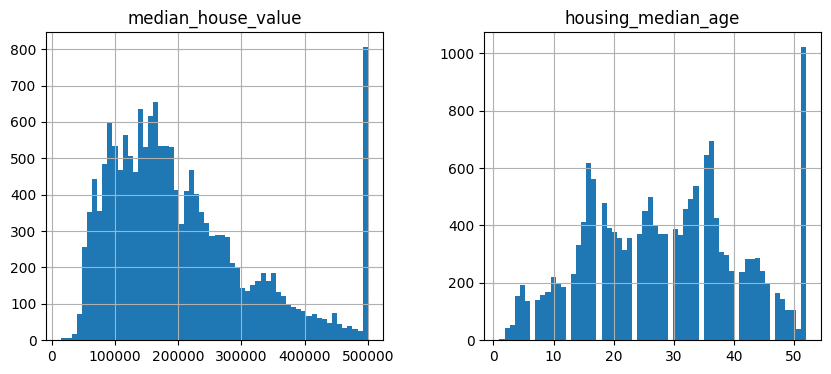

In [116]:
data_iter4[["median_house_value","housing_median_age"]].hist(bins=60,figsize=(10, 4))

In [57]:
#Comme mentionné précédemment, il serait judicieux de retirer ces outliers car ils ne sont pas représentatifs 
#de la tendance générale et risquent d'impacter les performances de nos prédictions

In [117]:
data_iter4 = data_iter4[data_iter4['median_house_value'] != data_iter4['median_house_value'].max()]
data_iter4 = data_iter4[data_iter4['housing_median_age'] != data_iter4['housing_median_age'].max()] 

array([[<AxesSubplot:title={'center':'median_house_value'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>]],
      dtype=object)

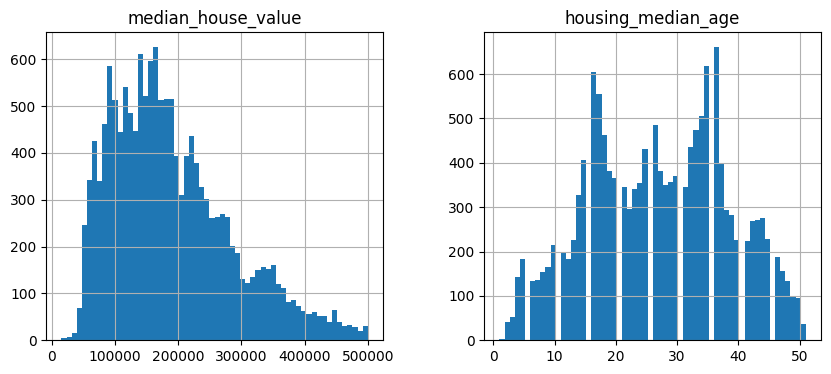

In [118]:
data_iter4[["median_house_value","housing_median_age"]].hist(bins=60,figsize=(10, 4))

In [119]:
#export iter 4 :
data_iter4.to_csv('data_iter4.csv', index = False, encoding='utf-8')

## 5eme iteration

In [99]:
data_log = np.log(data[columns])

<AxesSubplot:xlabel='total_rooms', ylabel='Density'>

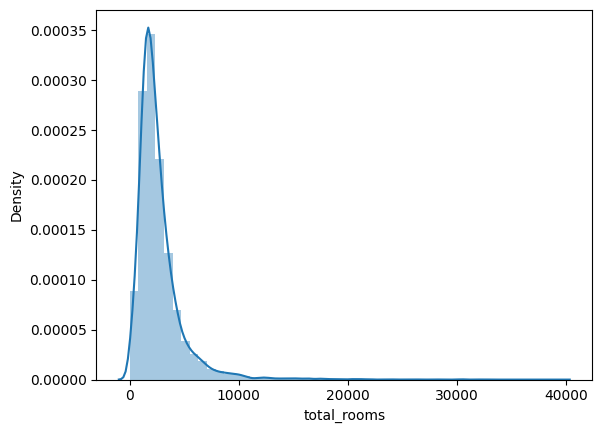

In [104]:
sns.distplot(data['total_rooms'])

<AxesSubplot:xlabel='total_rooms', ylabel='Density'>

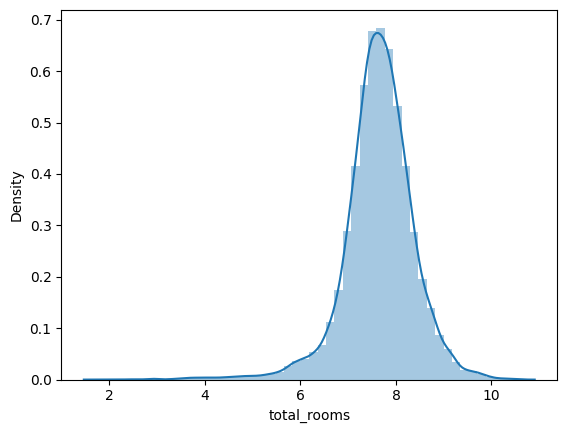

In [103]:
sns.distplot(data_log['total_rooms'])

Text(0.5, 1.0, 'Probplot after Box-Cox transformation')

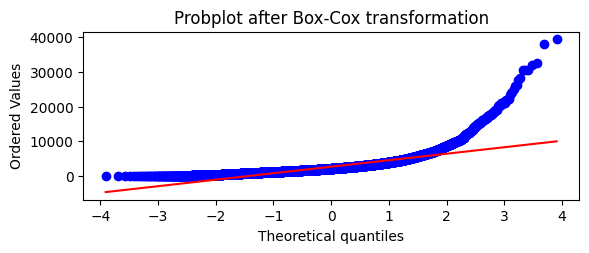

In [120]:
fig = plt.figure()
ax2 = fig.add_subplot(212)
stats.probplot(data['total_rooms'], dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

Text(0.5, 1.0, 'Probplot after Box-Cox transformation')

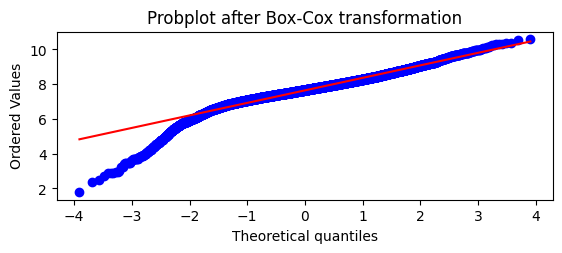

In [123]:
fig = plt.figure()
ax2 = fig.add_subplot(212)
stats.probplot(data_log['total_rooms'], dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

Text(0.5, 1.0, 'Probplot after Box-Cox transformation')

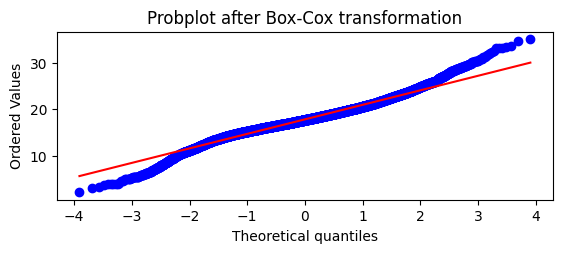

In [122]:
fig = plt.figure()
ax2 = fig.add_subplot(212)
stats.probplot(pd.Series(data_cox), dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

In [109]:
data['total_rooms'].skew()

4.2684735669180425

In [110]:
data_log['total_rooms'].skew()

-0.9323616000843687

In [112]:
data_cox = stats.boxcox(data['total_rooms'])[0]

In [114]:
pd.Series(data_cox).skew()

0.10768299116518235

<AxesSubplot:ylabel='Density'>

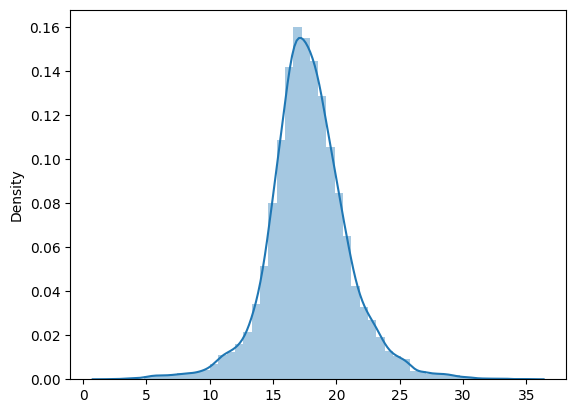

In [115]:
sns.distplot(pd.Series(data_cox))

In [127]:
data = data.drop(['ID'],axis=1)

In [128]:
data_transformed=data

In [130]:
data_transformed[columns] = data_transformed[columns].apply(lambda x: stats.boxcox(x)[0])

In [132]:
#export Jour 2 :
data_transformed.to_csv('Immo_J2.csv', index = False, encoding='utf-8')